In [44]:
import pandas as pd
import numpy as np

from sklearn.metrics import confusion_matrix
import seaborn as sns

import matplotlib.pyplot as plt

# Combined the Ground Truth & Survey Result

In [73]:
df_ground_truth = pd.read_csv('exported/ground_truth.csv', index_col='sheet_index')
df_ground_truth.head()

,Unnamed: 0,text,class,explicit_hate,implicit_hate,not_hate,offensive,check_correct_index
sheet_index,,,,,,,,
1,1989,that's b / c us mass media controlled by jews...,explicit_hate,1,0,0,0,True
2,5306,radix journal alternativehypothesis make the ...,not_hate,0,0,1,0,True
3,15718,"RT @JStac825: There's coon classic (R. Kelly, ...",not_hate,0,0,1,0,True
4,13101,#Turkish president Erdogan warned that the wor...,not_hate,0,0,1,0,True
5,12542,http://actoneprogram.com Don't give up on Hol...,not_hate,0,0,1,0,True


In [74]:
df_result = pd.read_csv('exported/survey_result_v2.csv', index_col='sheet_index')
df_result.head(5)

,Unnamed: 0,annotator,text,explicit_hate_prediction,implicit_hate_prediction,not_hate_prediction,offensive_prediction,sum,sum_hate_prediction
sheet_index,,,,,,,,,
1,1989,daniel,that's b / c us mass media controlled by jews...,1,0,0,0,1,1
2,5306,daniel,radix journal alternativehypothesis make the ...,1,0,0,0,1,1
3,15718,daniel,"RT @JStac825: There's coon classic (R. Kelly, ...",0,0,1,0,1,0
4,13101,daniel,#Turkish president Erdogan warned that the wor...,0,0,1,0,1,0
5,12542,daniel,http://actoneprogram.com Don't give up on Hol...,0,0,1,0,1,0


In [75]:
print(df_ground_truth.shape)
print(df_result.shape)
print(df_survey.shape)

(900, 8)
(900, 9)
(900, 20)


In [76]:
df_ground_truth = pd.read_csv('exported/ground_truth.csv', index_col='sheet_index')
df_result = pd.read_csv('exported/survey_result_v2.csv', index_col='sheet_index')

# merge ground truth & survey result
df_survey = pd.merge(df_ground_truth, df_result, how='left', left_index=True, right_index=True)


# create the binary-hate columns
subset_binary_hate_columns = ['explicit_hate','implicit_hate','offensive']
df_survey['binary_hate'] = df_survey.loc[:,subset_binary_hate_columns].sum(axis=1)

subset_binary_hate_prediction_columns = ['explicit_hate_prediction','implicit_hate_prediction','offensive_prediction']
df_survey['binary_hate_prediction'] = df_survey.loc[:,subset_binary_hate_prediction_columns].sum(axis=1)

# remain only answers that are valid
subset_prediction_columns = ['explicit_hate_prediction','implicit_hate_prediction','not_hate_prediction','offensive_prediction']
df_survey['sum_annotator_answer'] = df_survey.loc[:,subset_prediction_columns].sum(axis=1)
# df_survey = df_survey[df_survey['sum_annotator_answer']==1]

df_survey.head()

,Unnamed: 0_x,text_x,class,explicit_hate,implicit_hate,not_hate,offensive,check_correct_index,Unnamed: 0_y,annotator,text_y,explicit_hate_prediction,implicit_hate_prediction,not_hate_prediction,offensive_prediction,sum,sum_hate_prediction,binary_hate,binary_hate_prediction,sum_annotator_answer
sheet_index,,,,,,,,,,,,,,,,,,,,
1,1989,that's b / c us mass media controlled by jews...,explicit_hate,1,0,0,0,True,1989,daniel,that's b / c us mass media controlled by jews...,1,0,0,0,1,1,1,1,1
2,5306,radix journal alternativehypothesis make the ...,not_hate,0,0,1,0,True,5306,daniel,radix journal alternativehypothesis make the ...,1,0,0,0,1,1,0,1,1
3,15718,"RT @JStac825: There's coon classic (R. Kelly, ...",not_hate,0,0,1,0,True,15718,daniel,"RT @JStac825: There's coon classic (R. Kelly, ...",0,0,1,0,1,0,0,0,1
4,13101,#Turkish president Erdogan warned that the wor...,not_hate,0,0,1,0,True,13101,daniel,#Turkish president Erdogan warned that the wor...,0,0,1,0,1,0,0,0,1
5,12542,http://actoneprogram.com Don't give up on Hol...,not_hate,0,0,1,0,True,12542,daniel,http://actoneprogram.com Don't give up on Hol...,0,0,1,0,1,0,0,0,1


In [77]:
df_survey.shape

(900, 20)

In [53]:
df_survey[df_survey.duplicated(subset=['text_x'])]

,Unnamed: 0_x,text_x,class,explicit_hate,implicit_hate,not_hate,offensive,check_correct_index,Unnamed: 0_y,annotator,text_y,explicit_hate_prediction,implicit_hate_prediction,not_hate_prediction,offensive_prediction,sum,sum_hate_prediction,binary_hate,binary_hate_prediction,sum_annotator_answer
sheet_index,,,,,,,,,,,,,,,,,,,,


In [54]:
df_survey['not_hate'].value_counts()

0    450
1    450
Name: not_hate, dtype: int64

In [55]:
df_survey['binary_hate'].value_counts()

1    450
0    450
Name: binary_hate, dtype: int64

# Confusion Matrix

## Binary Classification

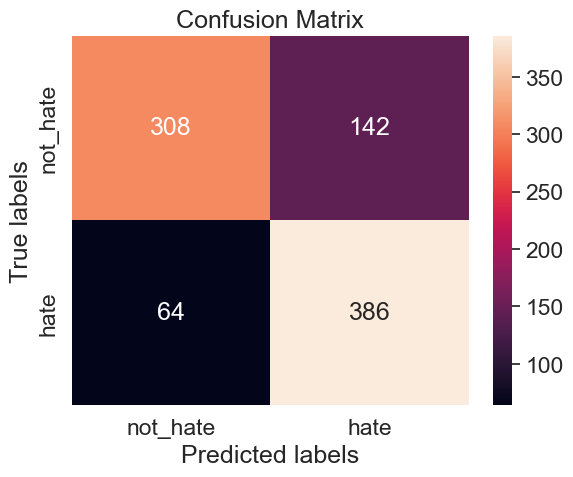

In [78]:
cfm_binary = confusion_matrix(df_survey['binary_hate'], df_survey['binary_hate_prediction'])

ax = plt.subplot()
sns.set(font_scale=1.5)
# labels, title and ticks

sns.heatmap(cfm_binary, ax=ax, annot=True, fmt='g')

ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['not_hate', 'hate']);
ax.yaxis.set_ticklabels(['not_hate', 'hate']);
plt.show()

In [80]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

print('acc \t', accuracy_score(df_survey['binary_hate'], df_survey['binary_hate_prediction']))
print('F1 \t', f1_score(df_survey['binary_hate'], df_survey['binary_hate_prediction']))

acc 	 0.7711111111111111
F1 	 0.7893660531697342


## Multi-class Classification

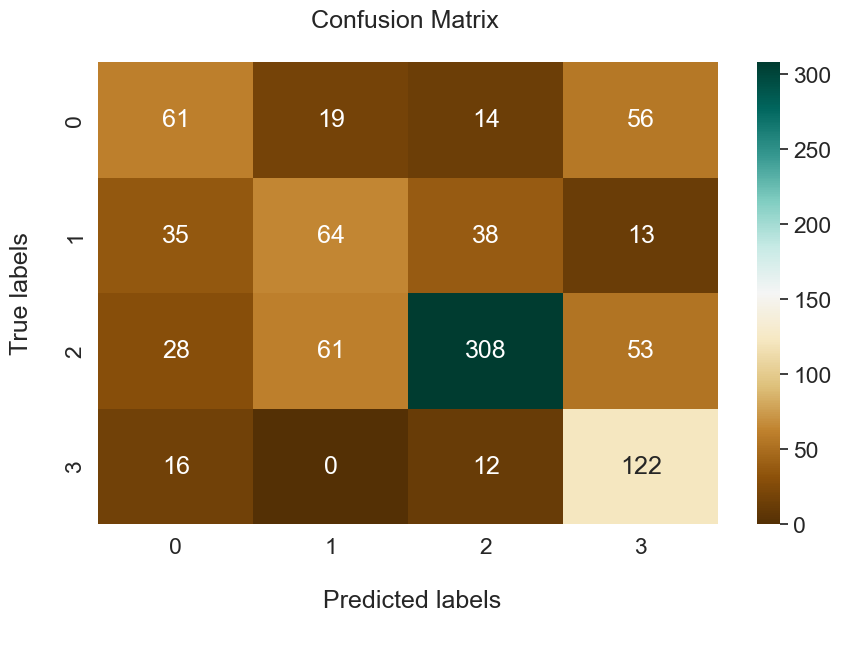

In [79]:
plt.figure(figsize=(10,6))
subset_true = ['explicit_hate', 'implicit_hate', 'not_hate', 'offensive']
subset_prediction = ['explicit_hate_prediction', 'implicit_hate_prediction', 'not_hate_prediction', 'offensive_prediction']

fx=sns.heatmap(confusion_matrix(df_survey[subset_true].values.argmax(axis=1),df_survey[subset_prediction].values.argmax(axis=1)), annot=True, fmt="g", cmap='BrBG')
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted labels\n')
fx.set_ylabel('True labels\n');
plt.show()

In [81]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
df_survey[subset_true],df_survey[subset_prediction]
print('acc \t', accuracy_score(df_survey[subset_true],df_survey[subset_prediction]))

acc 	 0.6166666666666667


In [71]:
df_survey[subset_prediction].isnull().sum()

explicit_hate_prediction    1
implicit_hate_prediction    0
not_hate_prediction         0
offensive_prediction        2
dtype: int64